In [1]:
%matplotlib inline
import re
import getpass
import gmaps
import requests
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
from urllib.parse import urljoin
from IPython.display import clear_output, display
from parse import parse
import yaml
import time
import os
import sys
import pandas as pd
import xarray as xr
from shapely.wkb import loads
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.point import Point
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
import json
from fabric2 import Connection

#adding prognos tools
sys.path.insert(0, "../../PROGNOS/")
from prognos_tools.encrypt import decryptString
from prognos_tools.Basin_fabric2 import Basin
import prognos_tools.metnoRequests as metno


storageToken=b'gAAAAABdiMKRN9CAWkwJjaORtRqmHmoAqR8j02XBp5PA18aPsIGdyMDAXN-pTYBjNAr0AaoZ6-kO2kS5x4fbFJFOZhk298W518PEhgQNIkot-dkCJfgk369_AEHoOtqUd84hnrpO5v1a58mu9VGA74KwEpEk3mDEdkZVPffPgK1y5B8Gp_s9_iqvPKP8EC4M-i1CVIhRIOVGEK4udkY-BYP-B20tYHarrbAigGwxeFxfpnSBQKUOtu4poU0GuJT0CLY7VUhqFb-0qTWQBmWqRg1e98_uMedZbGPjNKx1RAg7Z43-yb3M3OSFcaniRtXvzS5ScmVbsRuEWU2bR2hn2HWZY6m5oZdQPBWCoAknelAu7F3nMH3o-hGUciVDVaRGwGiD2qauyoPcbP0oP9kvjwSsysyFsomiRpewpaAkr2O85i0mXvehvGMMDZAKVFrCwJbXHR598ccCOp28Jo2-N91vadryW_-isdXF4vxKrlPwNDTqvy3m9WoxoeS98X5Z8U1cfbjVpy-UAzB16IzkivdkeOAteM_J6lZq2H5pnbG1TeF_f2kd3ul1FKV9xZGVxaBvT0G-YxjHM6HpYQn9O8rC_DfJUunoFToZp3VvG6hcTKjOl2inbaqqhcQ4RhavCymFFkR1FeMQ_2scNJcpiGUkI3GPGV7ujPlSpXVMkEViitT89thIIwsFL0IWvctJE35j42HArPhcEvvYWKBypt2Ok1jnVTNx7Vp4dE7V5HuXvkg65tjeHu2EFBVaIomhTdnqa2dUZ0Rj4F09J8s7NWA965V__LIp-30pSJaLKwAoRVs3DrkF11aV5EURNZyryXi6YwrLPCV5TodKvCmbCS-t1EVDpd50MX4KJErtuTAESvOQZTdFPMF0lR7ivMmc39luDOtSHupg0IiOqVaUVpw7GEF0FX4o4RZ61D4dx2xQ6nDBm0nyxOphGzkbHIGZmj9AnxTqVMDxfrFz9Edr2FBL4i3tORtIdGS_iDbiJvXm3fl1oYqe3bNqt_U-PKzlP9AXpsEkxyDPr6cNBqOE5coSFh9w1rJXfcdyQPt1p-57JydFQJmx2KvRmeYzXuruI1etqDF9eUzVVzC2GZfA__39-JFZMUDtNGsAwywbV6VB-xaNSi85wy7rjIitnWvo5tjqo1H8Hr-OFhrgvfKiXpWEF1_lBNIWqAnmPME8s-5CXIphMqKndp2ShMERviQX8C5aUosx3aIbnUboaUjxlIjiwCb1oXM_1_SRdoMmhKY87DibiRBJF_z1ouKmPnlUg-SAKYqh307Wd839PhlnxN8srVv8TdP7TkGlHZ_SoX6luloHB33Ejjuak0b0jG6o4yfyYgXHDDVkNRE7myeMhH4PKNqbLnG1USHxxsbT63h5R3LDwpU1MzjaGfEL3Mf86mTH6gsapWbImhtqlE1Orjq8Igx0O7tILowUBjmdBXcQw5Q4rhwe2ik-e18HnLycqCbq1ATcf2ldBmjpawzXUNVvZgqMq57eTraKgdM338gRT62Y2rVBZeFTURp-IIdN5NoWxBGnzFwyYPdq9aVXKtue9cDgeTHh3oP6lI9edu-baeGHi0bMzqPZppuht0-gZ1vVnEjapoMfj6hiqlfWUyG7Y4RqjQGabzAYxam0BhDXpSfvvoQCat02IyUG93d4gQQEjsyPQuVxV5pgKNA9YO99TqnKac2Xkr-zlqQyFe4J2NzkqDb-XSQXjOv2zkXaUZdFp54KnAb1iuc_tOgHZwpeMb_AkG9K_ACX2x7arG5slhNlUu-UXfLL5K9GdGXGQYJllyW3HTfi3ZjJthHn16fjMoxmzJU-qzqoKTT8HuU3sY9LLzKQJmlhpE915RDOsSlI6-znbTrqfGz_bm2putOb38HrH5i7ptR-ofCtblFa_jpYTx2R_A-2LSIokfOknXY7WPGciDY7YUzC_mz0SJYtNfQxF4ny6hKHVVh2Rt2XeP6-NsIqUaYrEDiFTz-kvXMA9MUQ70_z67oKr8dp8PK-kSPE_wdnjS1cUFVB1hhTm8HNsKqDNNB5byk7QN0GuTYXNk0hxKJK3i32UMclD8lLAP8Pa_nY4J47q84f3XSkNxJ571Lnr7RXSV88u3T6qnXWv0ciG4PAxXVwD_X2qpEY8-SyQqny2Yxw7xPbdwa7h6DrzXlzrk2pvI9KhEGuLtWMxiPOxiitDg0FEFJSHbfXZHKtqtFemav19nNrcBN-VbGLCt_bBVV4uuMs3W7nv-Y7MKFpKzQVdqYHbgbtSE3rgXQyLL_OirmxaBJz-DQXdystdR4epjtd1LNN8VXwnRv5Ln6siPPCy-QPp-ITKWe-ACsS3t3gIxTjgMpTVBbYp40OHfMwhk2iHDTA-DFlrilepwH8TWZG4LVl5fwHmv_rTpb_K01kv2_wAHZjCsNCtfTMiNjZTYepp3w_MbTG1KnV21L7UCi8ktj55W4vu4sh8REqiGfYDFhPJ444dae_-Wg_UdBwVrJtRWlPUW_m8V4kOgusQSgHPZCXR_SLAxWvbxd1MkzcXbIaCTj2hsseQFx3kUmNDj911E7rV1RbLRzaIFx6Weffy0U8mvrBh8kfZuHk8hAksdD-Ke4JC25ucn36y8MjGkV_bWf-h6I-2eijxg7da-3-R6EtPp8goTIkiFTO8IK84PEFnODhBvdGTYR81zMBmaYWnD3Ir0LZE4dGVc9jFYk22fZJ56httDKR130AsZ1B-nqlsfn-n9plJKoKWVjYLnfAI2TgOCndQCJ2fxkbjfS0x7eKCysUEijLX8vAqhwHCZOasikFlMGxmlHF-Ph_WunExoWhoxlvzP6FDny-0poTkllSRt9KN6rHn5rzqzxS-fSxW6GLnSn8Y7TsGpy0tn_KMRsGV5xbDJWFFMnvMf7hB1L9_Ut9fvzsX3Iz-O1ktqWnNQwBKi-MsFePpIXtKA4U8KQrWBf6TyASoqw79xVdlqbXwzYfg9Ur_kYh7nHXYKwP4oy2agTdYRzUydWi819NmgW_QFp72aUMGAKCxy5MpxJMDR_41OkQxyjuPHT_3HskCFjdcvUOgp0Hi8m-iU5D34PaVeGisC2H-rbyaS_ET3PtJ0kU1Xx3oF2xYM1q-4QB9qBxUyDdk5hBNxaoAslA8sE_Y1JfMzfyjIqK4OR5_noBkksj_f7tlezivS8eKmhClnSGboQVS5ypcEw5n8d-XQh8C58qKmQ2jUZOYyt6WBAD-TfzyqPxDX423z-Cuw=='
computeToken=b'gAAAAABdiMIg9OCnTJ3gsI_ZGqzRz2jbkLvVHtvw8stG7ljodd08gXOQFYuiclCtsPkSLgwvMiuro1QZw_8Y8txjIPBVOI313SGpfNj5UtfG1jZbNeMDMHJXz3w_be3a6JjsLJtXSmFNYrTKUJKioomQuugq0dI8oIgqQ5MrAx8hOheG1BB0lxW20UzE5W2izjXLqGhtBGQJVrvvt7j1-GFcDu-FvSEik4JQQK9miOJlfNfPUhY5wagCcC_FLmdc_9vmBVo7xprhGkQjFmO_EbQJVkNIteE0QWt77x2zPkuOowyMxfDAP9KyOte2q5vrrX27InZ4OXNdoAP56kFYJ0dvqiq7vkPK2cliroFo3fDgm-SyPxZx4S37ga8aOanpESKpKZke7ea-EQoAOQqGGk9OA8tVDa2kJNvZEoZLa0xPI1rBiMPna3PWHoinfO0C3ohuDYIUPYKWNrymNmrNvdtkUMD9COvAWGP-wEZ7S7iZN9NlBJ_uUmFVpTNGVwBrGCebxW3byN5CSxQ7zKHuvlWI0-sggUph58lTYq1FThwZ2YM0hPDmO4Wvlefneyf3OYAURfAjU4Z9v8SZc2EUgb8jHLscTwY1hQWdVFDEgxFJ2vLOXX3yvfPfzNw0Fz9OlU2hwLqyZNYE7XoZaC2A2ndl9OjsKalqeyAmUoyRx-EN1IAMt-cvMwCXCiCzKgu1tmObye_evqcW2KRZ2hgvUBXWX_gtqDLa9RumxnKw9mw8aTfqoCumK74Vr9c4L6csJOkJyoZCDeKyfvMRgIPnFR4GThTZjdBRE4jMFnPV5I_pjcfNSX8gEXoKuH7pcWSMmSUZ2-IPTZeJVBT4yFpamKuYhao67ZVOCeIg0RTwnywuQZK3VGNqL0c27z_L_Y7uW-T0MV-Z8wv0hxqOT5JQ_xl_OIVGCUitQRnrN_ZIECIr6lpdhYk8HH73yOGKGtR6lMFK7ww99z4fWFl5X0opYrbMpI5dJ8kxB7u85escismPL2FFvib4s69hzBPAdXVaos2j1aquixf3pYIOOtnQE1_H0-JHZnmtfg4SBIUvyFVeWpxgBfcgvS-3YiUJLf5BU9hiSYLMMzIJbQspKz_qh3rrcYwvYEyUffrqD2p-62D95YqL4SNtO0l9nnzCZ909b1sddEoF1W_qjxNFc92G3B0tqC8vgEp_3Ec1b3A8fPAmSHV1MEXfEhPLha_OUiKLA8tGCN9lA5kee4712SSO6C0ImImZt-UB2RnzKveqtUI6Id1qM4Evs_lDKiaIWl8kDL-dXROiTWsLbHY454n0RRmUYLnB2UXlVwUZwN8r12rbbTlQ8u6G-Zwujnb8Nex9PpdCQ2gV72-860TNWxPQHNUvOCbXKK3ZnolEPd_mtx0gXNO3N99nNc2G4h9Ro1zWHP8w2UWnBEYPLluqqCNc71w5Xw4rQeNlXSy9-UixdZzV-5JGXggj0cMMgC9dpdj_lagShtms5REijpEOMguhuSTLmYNNNXsPD7Lp7yz7qFCvdtQuIHYoqZXvuHEH3mbBr56C2eQ-m_VPVnO0zkB-1aWgRDm20g0xsxUH2oheVo85hSw_H7-lZNhMoBvn6M_owIrfo9ntm7k4DGWHqVdzHXL30S2QarUvR1r7oq4E4SJKhgsZp4OphXJs6mzSNCUWEabcsKwx9wSXJex1PuWypIASji5sweL97kSWxz-7K26DUx73C7jFzDhKk4zwTm5bj08qc1juN7KJl6xKMdeRMb-qI7jeL_W8lqqscKRXCmzGsDuYwpq5zP3z76C2-YCVMZS5fuI299AwPkzhG5aYc-2yaRaHW-dIDnwdzHdGnC5EL1MH6SUdeCw1vhdbD42gEKOc-FJGZdsFdbVKN4iHKiP7Ewp5RcxOmZEnXOVFDz2mDj_oXJXuuxj7EpGhSltGo58CpqDp9PXMqSqZ25mRB2ZUNHyKQxDtiItdnZzfXRbe0l_2oWrDdygvPbaUiV7pNf9V_owZpAKw0pEN_mQ0TbKbPDs-0RkImfLHUN8en26XDtUSVMlyH_coyAzTYpxpzhOclcTCq-qt9BmWPUd95ns4Qst5JLHXE5eA4aaFqAgKxyFtDIBb3G_cfCF4yjYxzmC3g7HgU0mQXAzzJ3-f8GYJeaVNLzKSnhx_lEDgvzhokc3dAiL6wyxqPgkYq6VvjqGqA1s85673gbKXB2wtfCKjaU2HcYZxPooX9JSWLUJ7dmwJm7CPUzLUPNu3jrk0LUJVe9MAugiKAgOj823uT-TiS4vu3M25uEs2Z8wJ38G-_8T24AYQkAUQuBTsVMssDIW8p_Yz2SWPwaJN9rzNIA_CI0JI0k60kWOmdNEPqjdcxAZgmCUBjanjhc8gxlMtVxbOSqewi95hNuuyd7gXKiRKvb4sMpqXviKe3HKFqdRvmfFBaWYKymLOx0-bxhwZkwjpZeKlh3oK4QCXbMedJ1pPOHY4nCfh4_TSbIKQPlC68ItsmsRENaiffwXz0mEQbYVCkWZ_gYnSER9Lc5P4-GBE3nQtxLEHOQQra0d5g0TLMDx0WjRv1M8hGZ8zUBHILuab_Y0jOURKYtJJLNIyHhH0qdFktk_0CoJplzL1Vu03ZUYGIS7zoEAFio9-MTGZ-zBuPow7flAS0V3VnSxRDlgY8Fn_Uc044EMlQ0Oszz8vIpUtAf9oAWpvu-wmtYrU2I2mrLUyxf2doG0O5lMwhEC7WKBaI4YYzwSt5NTaAZFVy-pe6hq4f0NBlvB083Gi5-eT_s9qOsagf2Rd9ssV9aZY4QNuqobTZTIOFqytZrraRfGAClGyppZlLrIlkOexIJBGEcwObYLhdPipdazozE4FRLjhDrAFqutE8yHeR_irOJ-20x8AYxp3q4xjR0D5xeyVy6RgWm8hhhEoPEX9XZkFrwho1J_TOuEAWCDy6D2pdK1DEcJmEE8MEUVKGJn4q6Rtn8uHSN8iz5dzwqifQFlgRDQahWUwOJhvQ1PgQSegeR2-bjRkWix2ap8CMFXcJAOwE01WggE8PSYhP9JKrSUsJPEJVOPwImWnvUhoQfsi6u4TeMqAvwOy87Z1NKIBleHAky1YwICJSnMmRPGHoB-Xfq32p3nG5XlHCsB1jr7FRifGqKoyA22hSHspqA7ZpwwitDLw3lzJ0HfZsuG91e2rAx2I5h0khw=='
gmapsToken=b'gAAAAABctxJp5wE73qK6U5VieCi0WXNnNex4KxLZHutsESa8fW9v43lLa1Ag0qsxKFjXXo9MBAdvUpqJPW-QmCE0gH_Opf9g4xAG1VaI2WarO_xDZg44VLMCHkd_6O8ofgp8u4VuFBMr'
metnoToken = b'gAAAAABaYEqld0O48m09jEyMUBFTdBmZA2BVey2r7FKbo_7zrJPOa1aEGcpW0WmnhGVJHYUPm32f8ttaiboXxAF-Q9hDat3lhsa4ELzrT6J_e402kRDmWi6k0kpldOC2LTBNM9vNLLF4'

key = getpass.getpass('Password: ')
apiKey = decryptString(gmapsToken,key)
computeKey =  json.loads(decryptString(computeToken,key))
storageKey =  json.loads(decryptString(storageToken,key))
metnoKey = decryptString(metnoToken, key)

metno.init(metnoKey,'https://frost.met.no')
with open('compute.json','w') as f:
    json.dump(computeKey,f)
with open('storage.json','w') as f:
    json.dump(storageKey,f)
gmaps.configure(api_key=apiKey)
del key,apiKey,computeKey,storageKey,metnoKey

#Creating folder to store temporary files and downloaded data
saveFolder = './DownloadedData/'

args = [saveFolder,]
!!rm -rf {args[0]} && mkdir -p {args[0]}

Password:  ·······


[]

## Creating instance to compute basin

# Meteo data
In this notebook, we'll get the catchment extent for Vansjø and will download meteo data from a nearby wheater station
## Instantiating VM to delineate basin

In [2]:
#Testing connection to google cloud
cloudInfo = {'project': 'nivacatchment',
             'zone': 'europe-west3-a',
             'instanceType' : "n1-standard-2",
             'instanceName' : "basin",
             'username' : "jose-luis",
             'keyDir' : './'
             }
basin=Basin('compute.json',cloudInfo,'storage.json')
display(basin.properties)

info = basin.get('projectInfo')
display('Can now talk to project {}'.format(info['name']))

#Setting ssh firewall for project
inOffice = False
if not inOffice:    
    with Connection('localhost') as c:
        hubIp = c.local('curl https://ipinfo.io/ip').stdout.strip()
        basin.setSSHPort(hubIp,inOffice=False)
        basin.setPostgresAccess(hubIp,inOffice=False)
else:
    basin.setSSHPort()
    basin.setPostgresAccess()

#Actually instantiating the machine
ip=basin.instantiate(wait=True) #wait until the vm is actually up and running
display(ip)

#Allowing local connections on the VM without password by modifying the pg_hba.conf file
with Connection(host=basin.properties['ip'],
                user=basin.properties['username'],
                connect_kwargs={"key_filename": basin.properties['keyFile'],}
                ) as c:
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+::1/128 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+127.0.0.1/32 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    c.sudo('''sed -i '1,/# IPv4 remote .*/!d' /etc/postgresql/9.6/main/pg_hba.conf''') #Deleting all settings for ipv4 connections
    c.sudo('''echo "host    all    all    151.157.0.0/16   md5" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null''') #Allowing connection from NIVA ip
    c.sudo('''echo "host    all    all    {}/32    trust" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null'''.format(hubIp)) #Allowing connection form hub ip
    c.sudo("service postgresql restart")


#Defining custom queries to geodatabase. Note that we forwarded the port on the VM to the
#local 5432 port so as to be able to talk to postgresql through the local port
def query(query,fetch=True):
    db = psycopg2.connect(host=ip, port=5432, database='geonorway')
    cursor = db.cursor()
    cursor.execute(query)
    if fetch:
        result = cursor.fetchall()
        db.close()
        return result
    db.close()

['Oct 11 09:22:32 basin systemd[1]: Startup finished in 2.100s (kernel) + 1min 58.806s (userspace) = 2min 907ms.']

'34.89.200.74'

## Delineating basin

In [3]:
basin.setConnection()
schema = 'metno'
station =  'Vansjø'
stationsFile = '{}.yaml'.format(station)
stations = yaml.safe_load(open(stationsFile))
display(station)
#Actually processing the basin
geoResultsFolder='./geoResults'
basin.getBasinLayers(stationsFile,schema,saveFolder=geoResultsFolder)


sql = '''UPDATE metno.resultsshp AS a
SET basin = (SELECT ST_Union(b.basin)
FROM metno.resultsshp AS b
WHERE b.station_id = 0 OR b.station_id = 1)
WHERE a.station_id = 0;
DELETE FROM metno.resultsshp AS a WHERE a.station_id = 1;
ALTER TABLE metno.resultsshp
ADD COLUMN area DOUBLE PRECISION;
UPDATE metno.resultsshp
SET area = (ST_Area(basin));
'''

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

'Vansjø'

'Directory should be created'

Gonna create the getBasin.sh file
./geoResults/getBasin.sh


NOTICE:  table "stations" does not exist, skipping


 initializestations 
--------------------
 
(1 row)

 addstations 
-------------
 
(1 row)



NOTICE:  schema "metno" does not exist, skipping


 initializeresultsschema 
-------------------------
 
(1 row)



NOTICE:  table "buffertable" does not exist, skipping


 createdatatable 
-----------------
 
(1 row)

 createresultstable 
--------------------
 
(1 row)

0
Initializing... 
Done (postgis major version: 2).
Output shape: Point
Dumping: X [1 rows].
Gage Watershed version 5.3.8
Input file PG:dbname=geonorway schema=metno table=flow column=rast where='station_id=0' mode=2 has projected coordinate system.


This run may take on the order of 2 minutes to complete.
This estimate is very approximate. 
Run time is highly uncertain as it depends on the complexity of the input data 
and speed and memory of the computer. This estimate is based on our testing on 
a dual quad core Dell Xeon E5405 2.0GHz PC with 16GB RAM.


Size: 2
Read time: 7.996076
Compute time: 2.218546
Write time: 1.294433
Total time: 11.509055
Creating output basin0.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


Shapefile type: Polygon
Postgis type: POLYGON[2]


SET
SET


ERROR:  column not found in geometry_columns table
CONTEXT:  PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying,character varying) line 34 at RAISE
SQL statement "SELECT DropGeometryColumn('',$1,$2,$3)"
PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying) line 5 at SQL statement
NOTICE:  table "dummy" does not exist, skipping


DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                addgeometrycolumn                
-------------------------------------------------
 metno.dummy.geom SRID:3035 TYPE:POLYGON DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
INSERT 0 1
COMMIT
ANALYZE
INSERT 0 1
1
Initializing... 
Done (postgis major version: 2).
Output shape: Point
Dumping: X [1 rows].
Gage Watershed version 5.3.8
Input file PG:dbname=geonorway schema=metno table=flow column=rast where='station_id=1' mode=2 has projected coordinate system.


This run may take on the order of 1 minutes to complete.
This estimate is very approximate. 
Run time is highly uncertain as it depends on the complexity of the input data 
and speed and memory of the computer. This estimate is based on our testing on 
a dual quad core Dell Xeon E5405 2.0GHz PC with 16GB RAM.


Size: 2
Read time: 1.805754
Compute time: 1.194347
Write time: 0.407495
Total time: 3.407596
Creating output basin1.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


Shapefile type: Polygon
Postgis type: POLYGON[2]


SET
SET
          dropgeometrycolumn           
---------------------------------------
 metno.dummy.geom effectively removed.
(1 row)

DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                addgeometrycolumn                
-------------------------------------------------
 metno.dummy.geom SRID:3035 TYPE:POLYGON DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
COMMIT
ANALYZE
INSERT 0 1
DROP TABLE
COPY 2
COPY 1
COPY 2
UPDATE 1
DELETE 1
ALTER TABLE
UPDATE 1


<Result cmd='rm sql.sql' exited=0>

CREATE ROLE
GRANT
GRANT


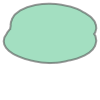

DROP TABLE


NOTICE:  table "lake" does not exist, skipping
Shapefile type: PolygonZ
Postgis type: MULTIPOLYGON[4]


SET
SET
BEGIN
CREATE TABLE
ALTER TABLE
                  addgeometrycolumn                  
-----------------------------------------------------
 metno.lake.geom SRID:3035 TYPE:MULTIPOLYGON DIMS:4 
(1 row)

INSERT 0 1
COMMIT
ANALYZE


<Result cmd='shp2pgsql -s 32633:3035 vansjø metno.lake | psql -d geonorway' exited=0>

In [4]:
# Adding user jovyan 
sql = '''CREATE ROLE jovyan WITH LOGIN;
GRANT USAGE ON SCHEMA metno TO jovyan;
GRANT SELECT ON ALL TABLES IN SCHEMA metno TO jovyan;
'''

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

from shapely import wkb
from geopy.distance import distance
a  = query("select st_transform(st_buffer(basin,50000),4326) from metno.resultsshp")
buffer = wkb.loads(a[0][0], hex=True)
display(buffer)

#Adding lake to database
basin.connection.put('/home/jovyan/watexr/Norwegian_lakes/vansjø.tar')
basin.connection.run('tar -xf vansjø.tar')
basin.connection.run('rm vansjø.tar')
basin.connection.run('echo "drop table if exists metno.lake;" | psql -d geonorway')
basin.connection.run('shp2pgsql -s 32633:3035 vansjø metno.lake | psql -d geonorway')



## Displaying basin

In [5]:
#Adding basin
a = query('''SELECT json_build_object('type', 'FeatureCollection',
                                      'features', json_agg(json_build_object(
                                                                'type',       'Feature',
                                                                'label',      station_name,
                                                                'geometry',   ST_AsGeoJSON(ST_ForceRHR(St_Transform(basin,4326)))::json,
                                                                'properties', jsonb_set(row_to_json(resultsShp)::jsonb,'{basin}','0',false)
                                                                )
                                                            )
                                     )
             FROM metno.resultsShp;''')

fig = gmaps.figure(map_type="TERRAIN")
vansjø_basin = gmaps.geojson_layer(a[0][0])
fig.add_layer(vansjø_basin)

#Adding marker at outlet
c = query('''SELECT a.station_name, st_x(st_transform(a.outlet,4326)),
    st_y(st_transform(a.outlet,4326)), st_area(b.basin)/1e6
    FROM metno.demShp AS a
    INNER JOIN metno.resultsShp AS b 
    ON a.station_id = b.station_id''')

outlets = [{"name": i[0], "area": i[3]} for i in c]
locations = [(float(i[2]),float(i[1])) for i in c]
info_box_template = """
<dl>
<font color="black">
<dt>Name</dt><dd>{name}</dd>
<dt>Area</dt><dd>{area} km<sup>2</sup></dd>
</font>
</dl>
"""                                                
outlet_info = [info_box_template.format(**outlet) for outlet in outlets]                                                 
marker_layer = gmaps.marker_layer(locations, info_box_content=outlet_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Getting available data in nearby stations



In [6]:
basin.delete('instanceInfo')
allStations = metno.getAvailableDatasets()

In [7]:
display(set([i["elementId"] for i in allStations['data']]))

{'accumulated(precipitation_amount)',
 'air_pressure_at_sea_level',
 'air_pressure_at_sea_level_qnh',
 'air_temperature',
 'air_temperature_vertical_difference',
 'beaufort_wind_force',
 'best_estimate_mean(air_temperature P1D)',
 'best_estimate_mean(air_temperature P1M)',
 'best_estimate_mean(air_temperature P1Y)',
 'best_estimate_mean(air_temperature P3M)',
 'best_estimate_mean(air_temperature_anomaly P1M 1961_1990)',
 'best_estimate_mean(air_temperature_anomaly P1Y 1961_1990)',
 'best_estimate_mean(air_temperature_anomaly P3M 1961_1990)',
 'best_estimate_sum(precipitation_amount P1M)',
 'best_estimate_sum(precipitation_amount P1Y)',
 'best_estimate_sum(precipitation_amount P3M)',
 'best_estimate_sum(precipitation_amount_anomaly P1M 1961_1990)',
 'best_estimate_sum(precipitation_amount_anomaly P1Y 1961_1990)',
 'best_estimate_sum(precipitation_amount_anomaly P3M 1961_1990)',
 'boolean_clear_sky_weather(cloud_area_fraction P1D)',
 'boolean_fair_weather(cloud_area_fraction P1D)',
 'boo

In [8]:
stationIds = list(set([i['sourceId'][:-2] for i in allStations['data'] if 'SN' in i['sourceId']]))
#The list is too long for a single query, let's split it
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
allCoordinates = []
for i in chunks(stationIds,100):
    data = metno.getCoordinates(i)
    allCoordinates.extend(data['data'])

### Finding nearby stations with meteo variables, given a time period

In [9]:
now = pd.to_datetime('today').strftime('%Y-%m-%d')
datesToGet = '1960-01-01/{}'.format(now)
start = datesToGet.split('/')
finish = pd.datetime.strptime(start[1],'%Y-%m-%d')
start = pd.datetime.strptime(start[0],'%Y-%m-%d')

longitude=locations[0][1]
latitude=locations[0][0]

def hasInfo(variable,timeResolution='P1D'):
    stationsWithVariable = [i for i in allStations['data'] if variable == i['elementId']
                           and 'SN' in i['sourceId']
                           #and start >= pd.datetime.strptime(i['validFrom'],'%Y-%m-%dT%H:%M:%S.%fZ')
                          # and (finish <= pd.datetime.strptime(i['validTo'],'%Y-%m-%dT%H:%M:%S.%fZ') if 'validTo' in i else True) 
                           and i['timeResolution'] == timeResolution
                           ]
    #Getting rid of repeated stations
    stationsWithVariable = {i['sourceId']:i for i in stationsWithVariable}.values()
    #Combining with station metada
    stationsWithVariable = [  
        {"name" : b['name'], 
         "location" : b['geometry']['coordinates'][::-1], 
          "id" : a['sourceId'],
          "validFrom" : a['validFrom'],
          "variable" : a['elementId'],
          "distance" : "{:0.2f}".format(distance([longitude,latitude], b['geometry']['coordinates']).km)
        } #dict(a,**b) 
        for a in stationsWithVariable for b in allCoordinates if a['sourceId'][:-2] == b['id']
        and (Point(b['geometry']['coordinates']).within(buffer) if 'geometry' in b else False)
    ]
    #station = Point(metadata['geometry']['coordinates'])
         
    return stationsWithVariable

def getMarkerLayer(stations):
    info_box_template = """
    <dl>
    <dt>Met station</dt><dd>{name}</dd>
    <dt>id</dt><dd>{id}</dd>
    <dt>valid from</dt><dd>{validFrom}</dd>
    <dt>variable</dt><dd>{variable}</dd>
    <dt>distance</dt><dd>{distance} km</dd>
    </dl>
    """    
    station_locations = [station["location"] for station in stations]
    station_names = [station["name"] for station in stations]
    station_info = [info_box_template.format(**station) for station in stations]                                                 
    return gmaps.marker_layer(station_locations, info_box_content=station_info,hover_text=station_names)

varStations = {}
numStations = 10

In [10]:
precipStations = hasInfo('sum(precipitation_amount P1D)')
varStations['precipitation'] = sorted(precipStations, key=lambda k: k['distance'])[:numStations] 

fig = gmaps.figure()
#fig.add_layer(buffer_layer)
fig.add_layer(vansjø_basin)
fig.add_layer(getMarkerLayer(precipStations))
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
humStations = hasInfo('mean(relative_humidity P1D)')
#display(humStations)
varStations['humidity'] = sorted(humStations, key=lambda k: k['distance'])[:numStations] 

fig = gmaps.figure()
fig.add_layer(vansjø_basin)
fig.add_layer(getMarkerLayer(humStations))
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
windStations = hasInfo('mean(wind_speed P1D)')
#Getting data only for the three closest stations
varStations['wind_speed'] = sorted(windStations, key=lambda k: float(k['distance']))[:numStations] 

fig = gmaps.figure()
fig.add_layer(getMarkerLayer(windStations))
fig.add_layer(vansjø_basin)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#windDirStations = hasInfo('wind_from_direction')
#varStations['wind_direction'] = sorted(windDirStations, key=lambda k: float(k['distance']))[:numStations] 

#fig = gmaps.figure()
#fig.add_layer(getMarkerLayer(windDirStations))
#fig.add_layer(vansjø_basin)
#fig

In [14]:
radStations = hasInfo('mean(surface_downwelling_shortwave_flux_in_air PT1H)',timeResolution='PT1H')
varStations['radiation'] = sorted(radStations, key=lambda k: float(k['distance']))[:numStations] 

fig = gmaps.figure()
fig.add_layer(getMarkerLayer(radStations))
fig.add_layer(vansjø_basin)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
pressStations = hasInfo('mean(air_pressure_at_sea_level P1D)')
varStations['air_pressure'] = sorted(pressStations, key=lambda k: float(k['distance']))[:numStations] 

fig = gmaps.figure()
fig.add_layer(getMarkerLayer(pressStations))
fig.add_layer(vansjø_basin)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
tempStations = hasInfo('mean(air_temperature P1D)')
varStations['air_temperature'] = sorted(tempStations, key=lambda k: float(k['distance']))[:numStations] 

fig = gmaps.figure()
fig.add_layer(getMarkerLayer(tempStations))
fig.add_layer(vansjø_basin)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
cloudStations = hasInfo('mean(cloud_area_fraction P1D)')
varStations['cloud_cover'] = sorted(cloudStations, key=lambda k: float(k['distance']))[:numStations] 

fig = gmaps.figure()
fig.add_layer(getMarkerLayer(cloudStations))
fig.add_layer(vansjø_basin)
fig

Figure(layout=FigureLayout(height='420px'))

## Downloading data for the three nearest stations

#### Downloading data from station

In [18]:
def getData(stations):
    data={}
    instantiated=False
    for station in stations:
        df,junk = metno.downloadData(station['id'],
                                      station['variable'],
                                      datesToGet)
        print(df.describe())
        if instantiated is False:
            data=df
            instantiated=True
        else:
            data=pd.merge(data,df,left_index = True, right_index = True, how = 'outer')
    return data

allData = {}
for key, stations in varStations.items():
    display('Downloading {} data'.format(key))
    allData[key] = getData(stations)
    


'Downloading precipitation data'

Started download of sum(precipitation_amount P1D) in SN1950:0...
       sum(precipitation_amount P1D)_SN1950:0
count                            21684.000000
mean                                 2.366902
std                                  4.901144
min                                  0.000000
25%                                  0.000000
50%                                  0.100000
75%                                  2.500000
max                                 73.100000
Started download of sum(precipitation_amount P1D) in SN1650:0...
       sum(precipitation_amount P1D)_SN1650:0
count                            21652.000000
mean                                 2.408281
std                                  4.926258
min                                  0.000000
25%                                  0.000000
50%                                  0.000000
75%                                  2.500000
max                                 79.200000
Started download of sum(precipitation_amou

'Downloading humidity data'

Started download of mean(relative_humidity P1D) in SN4920:0...
       mean(relative_humidity P1D)_SN4920:0
count                           3370.000000
mean                              80.085757
std                               13.644951
min                               39.000000
25%                               71.000000
50%                               83.000000
75%                               91.000000
max                              101.000000
Started download of mean(relative_humidity P1D) in SN2650:0...
       mean(relative_humidity P1D)_SN2650:0
count                           4196.000000
mean                              79.379647
std                               12.063106
min                               32.000000
25%                               72.000000
50%                               82.000000
75%                               89.000000
max                              100.000000
Started download of mean(relative_humidity P1D) in SN17050:0...
       mean(relati

'Downloading wind_speed data'

Started download of mean(wind_speed P1D) in SN17380:0...
       mean(wind_speed P1D)_SN17380:0
count                       34.000000
mean                         1.023529
std                          1.068859
min                          0.200000
25%                          0.500000
50%                          0.600000
75%                          1.000000
max                          5.500000
Started download of mean(wind_speed P1D) in SN17150:0...
       mean(wind_speed P1D)_SN17150:0
count                    21653.000000
mean                         3.572817
std                          1.796439
min                          0.000000
25%                          2.200000
50%                          3.400000
75%                          4.600000
max                         13.400000
Started download of mean(wind_speed P1D) in SN17050:0...
       mean(wind_speed P1D)_SN17050:0
count                      701.000000
mean                         2.776890
std                          1.

'Downloading radiation data'

Started download of mean(surface_downwelling_shortwave_flux_in_air PT1H) in SN17380:0...
       mean(surface_downwelling_shortwave_flux_in_air PT1H)_SN17380:0
count                                       47463.000000             
mean                                          128.388595             
std                                           205.305159             
min                                            -4.100000             
25%                                             0.000000             
50%                                            18.100000             
75%                                           169.300000             
max                                           904.000000             
Started download of mean(surface_downwelling_shortwave_flux_in_air PT1H) in SN17050:0...
       mean(surface_downwelling_shortwave_flux_in_air PT1H)_SN17050:0
count                                       50077.000000             
mean                                          134.78

'Downloading air_pressure data'

Started download of mean(air_pressure_at_sea_level P1D) in SN17150:0...
       mean(air_pressure_at_sea_level P1D)_SN17150:0
count                                   21812.000000
mean                                     1011.850458
std                                        12.031653
min                                       955.900000
25%                                      1004.400000
50%                                      1012.500000
75%                                      1020.000000
max                                      1054.000000
Started download of mean(air_pressure_at_sea_level P1D) in SN17850:0...
       mean(air_pressure_at_sea_level P1D)_SN17850:0
count                                   10317.000000
mean                                     1012.076195
std                                        12.122692
min                                       959.400000
25%                                      1004.300000
50%                                      1012.600000
75%     

'Downloading air_temperature data'

Started download of mean(air_temperature P1D) in SN17380:0...
       mean(air_temperature P1D)_SN17380:0
count                          2318.000000
mean                              7.615703
std                               7.509991
min                             -20.600000
25%                               2.100000
50%                               7.300000
75%                              14.100000
max                              25.600000
Started download of mean(air_temperature P1D) in SN17400:0...
       mean(air_temperature P1D)_SN17400:0
count                           836.000000
mean                              8.159809
std                               8.173847
min                             -17.900000
25%                               1.100000
50%                               9.400000
75%                              15.000000
max                              25.400000
Started download of mean(air_temperature P1D) in SN17550:0...
       mean(air_temperature P1D)_SN17550

'Downloading cloud_cover data'

Started download of mean(cloud_area_fraction P1D) in SN17150:0...
       mean(cloud_area_fraction P1D)_SN17150:0
count                             19716.000000
mean                                  5.144603
std                                   2.276500
min                                   0.000000
25%                                   3.300000
50%                                   5.300000
75%                                   7.300000
max                                   8.000000
Started download of mean(cloud_area_fraction P1D) in SN17050:0...
       mean(cloud_area_fraction P1D)_SN17050:0
count                               669.000000
mean                                  5.252466
std                                   2.560995
min                                   0.000000
25%                                   3.300000
50%                                   5.700000
75%                                   8.000000
max                                   8.000000
Started download of me

In [19]:
import pickle
filename = 'metno.pickle'
with open(filename, 'wb') as handle:
    pickle.dump([varStations,allData], handle, protocol=pickle.HIGHEST_PROTOCOL)


In [20]:
def plotVar(variable):
    allData[variable].plot(subplots=True,
                           figsize=(20,3*len(allData[variable].columns)),
                           marker='.',
                           markersize=1,                           
                           linestyle='None')

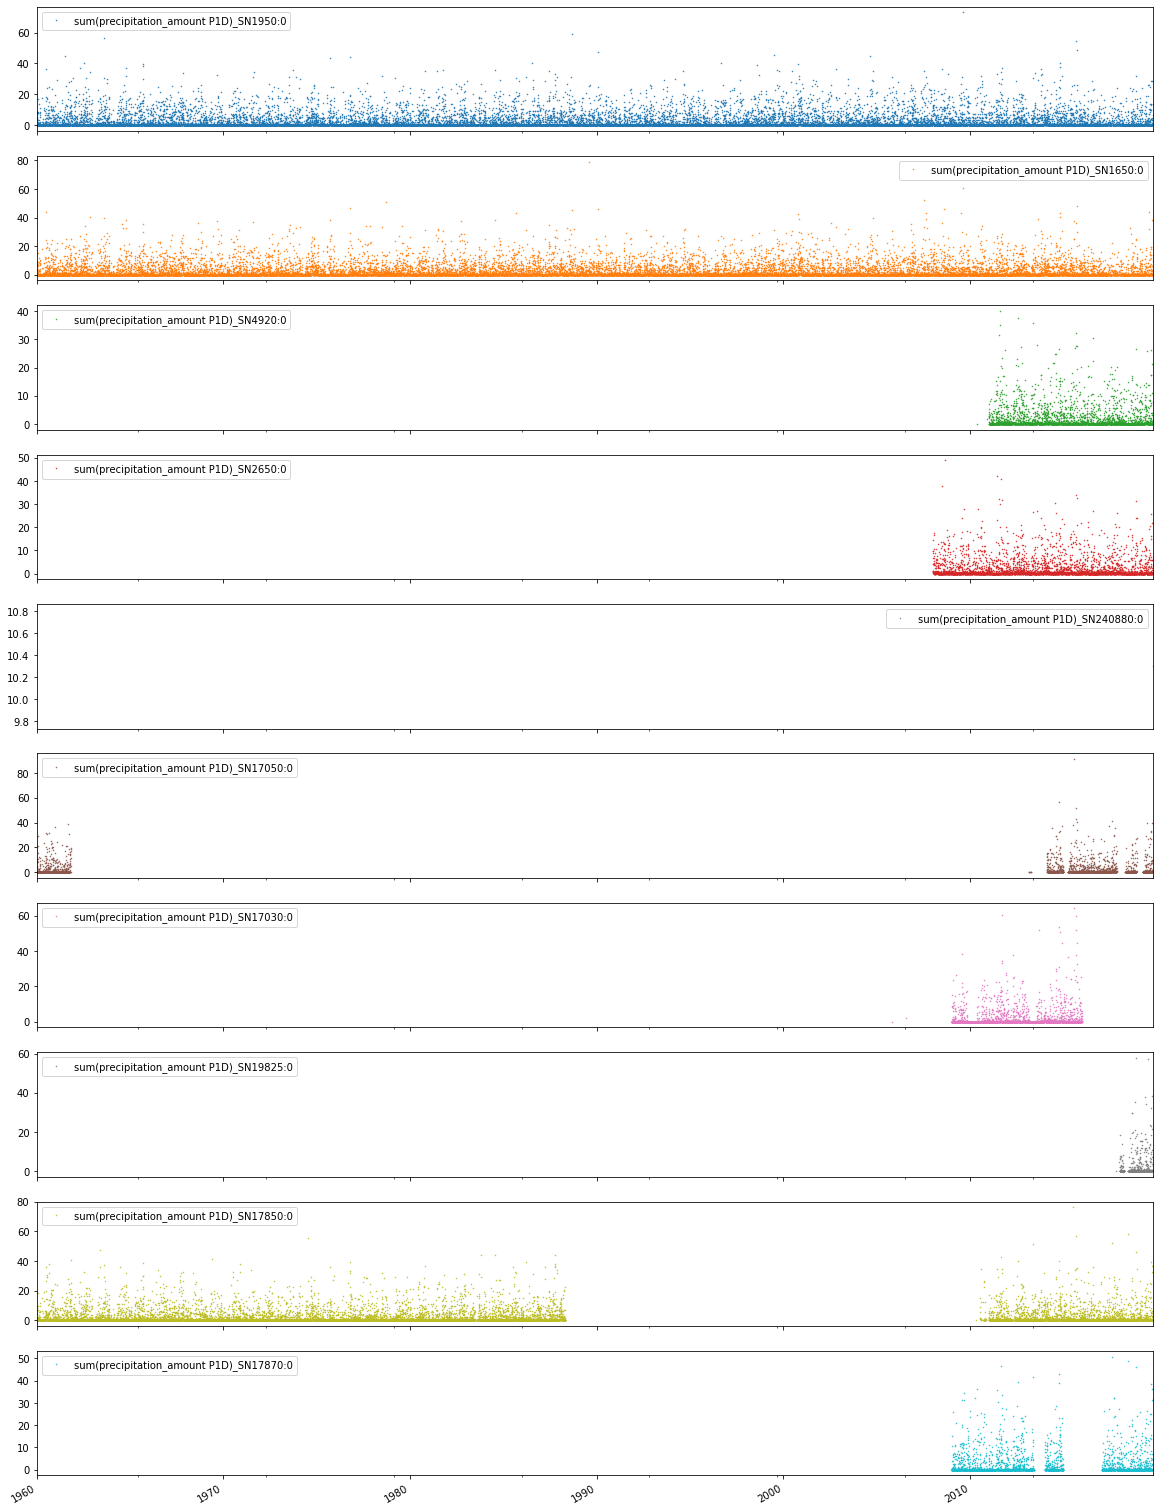

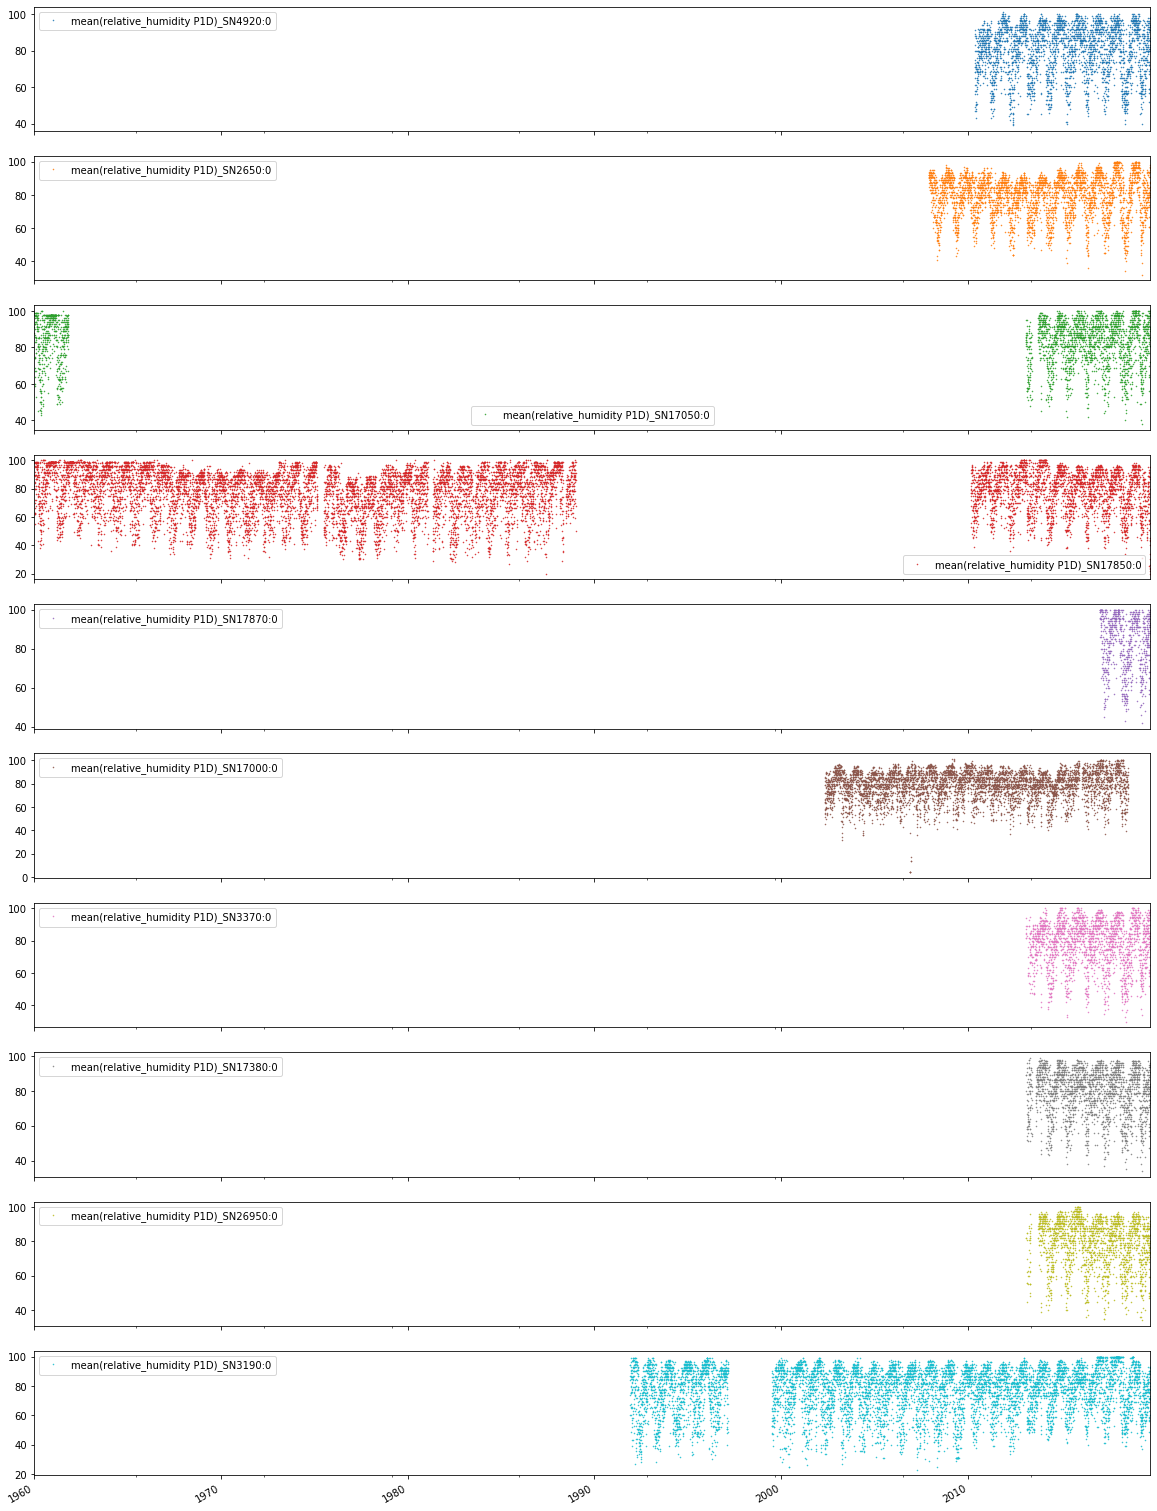

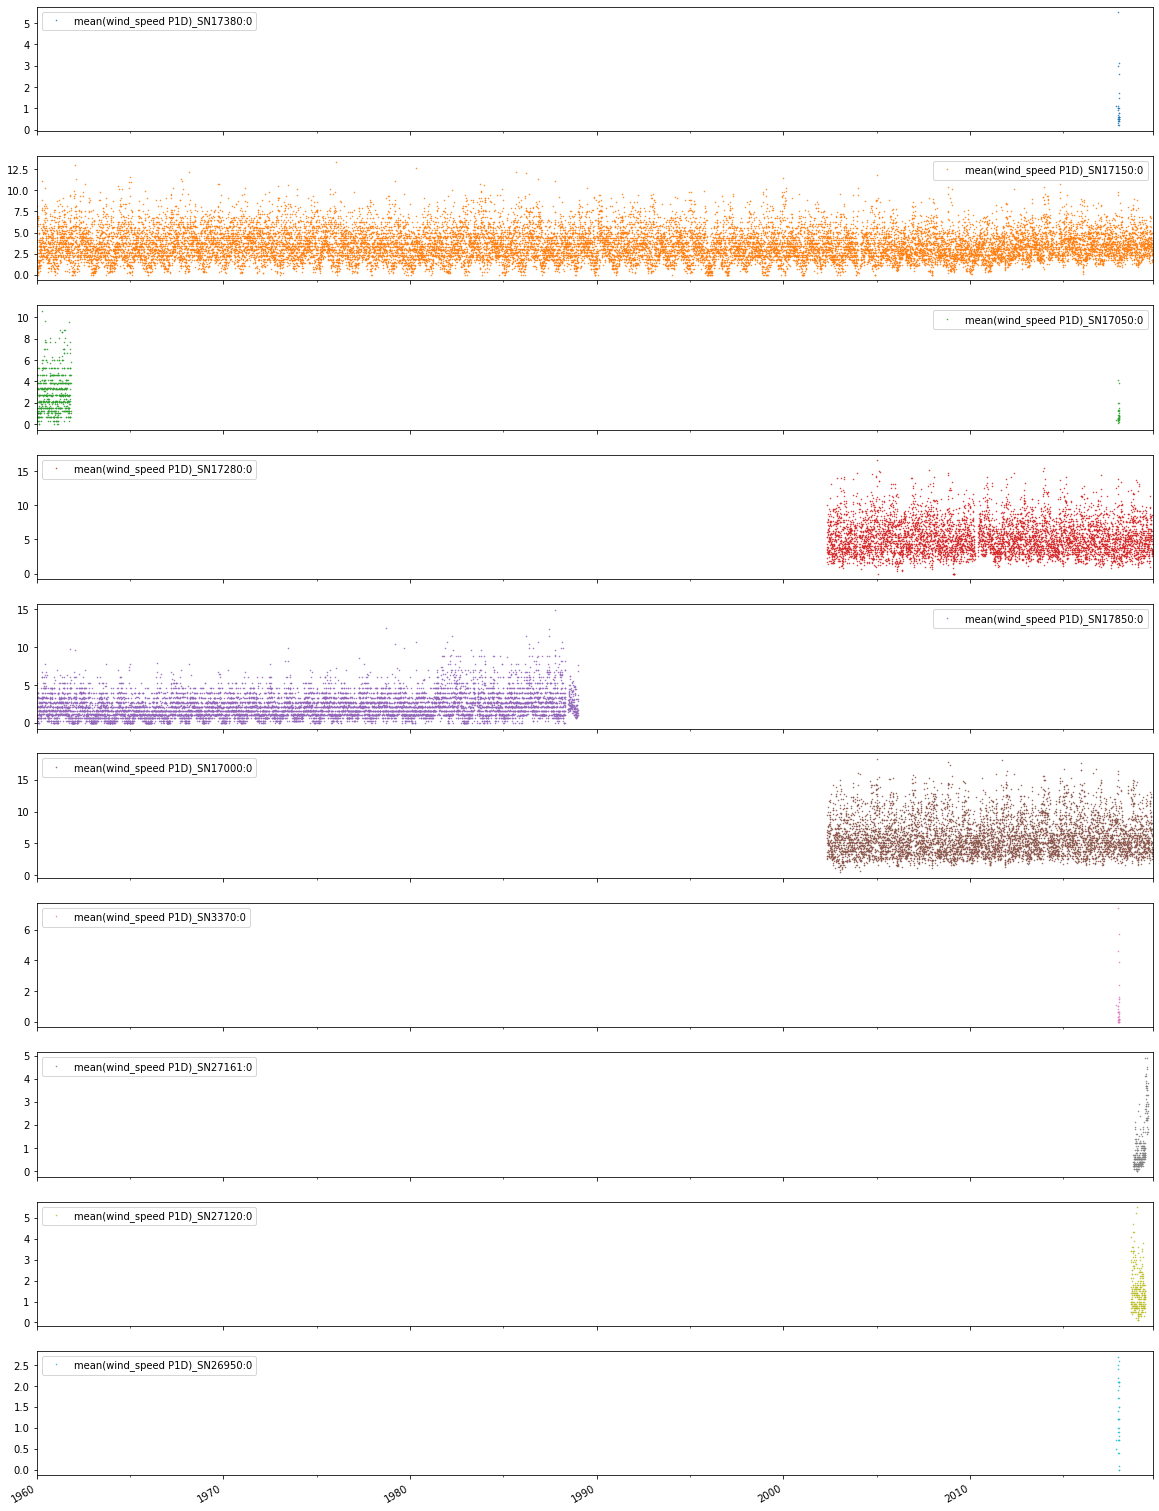

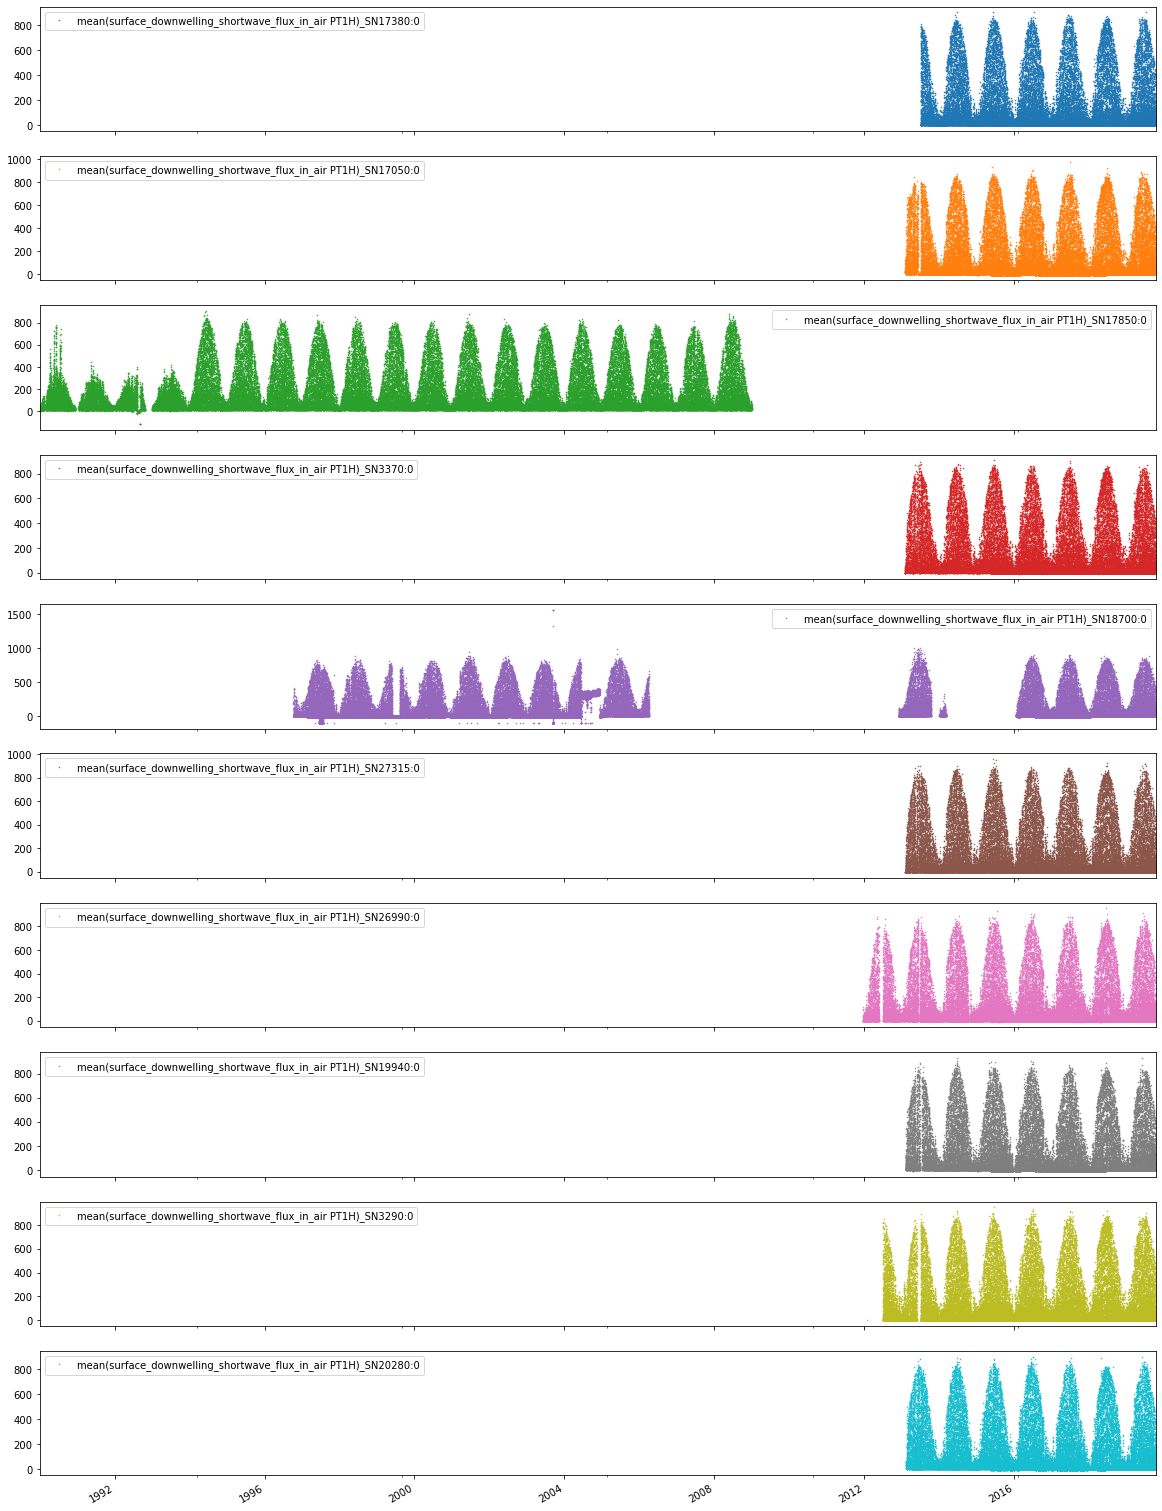

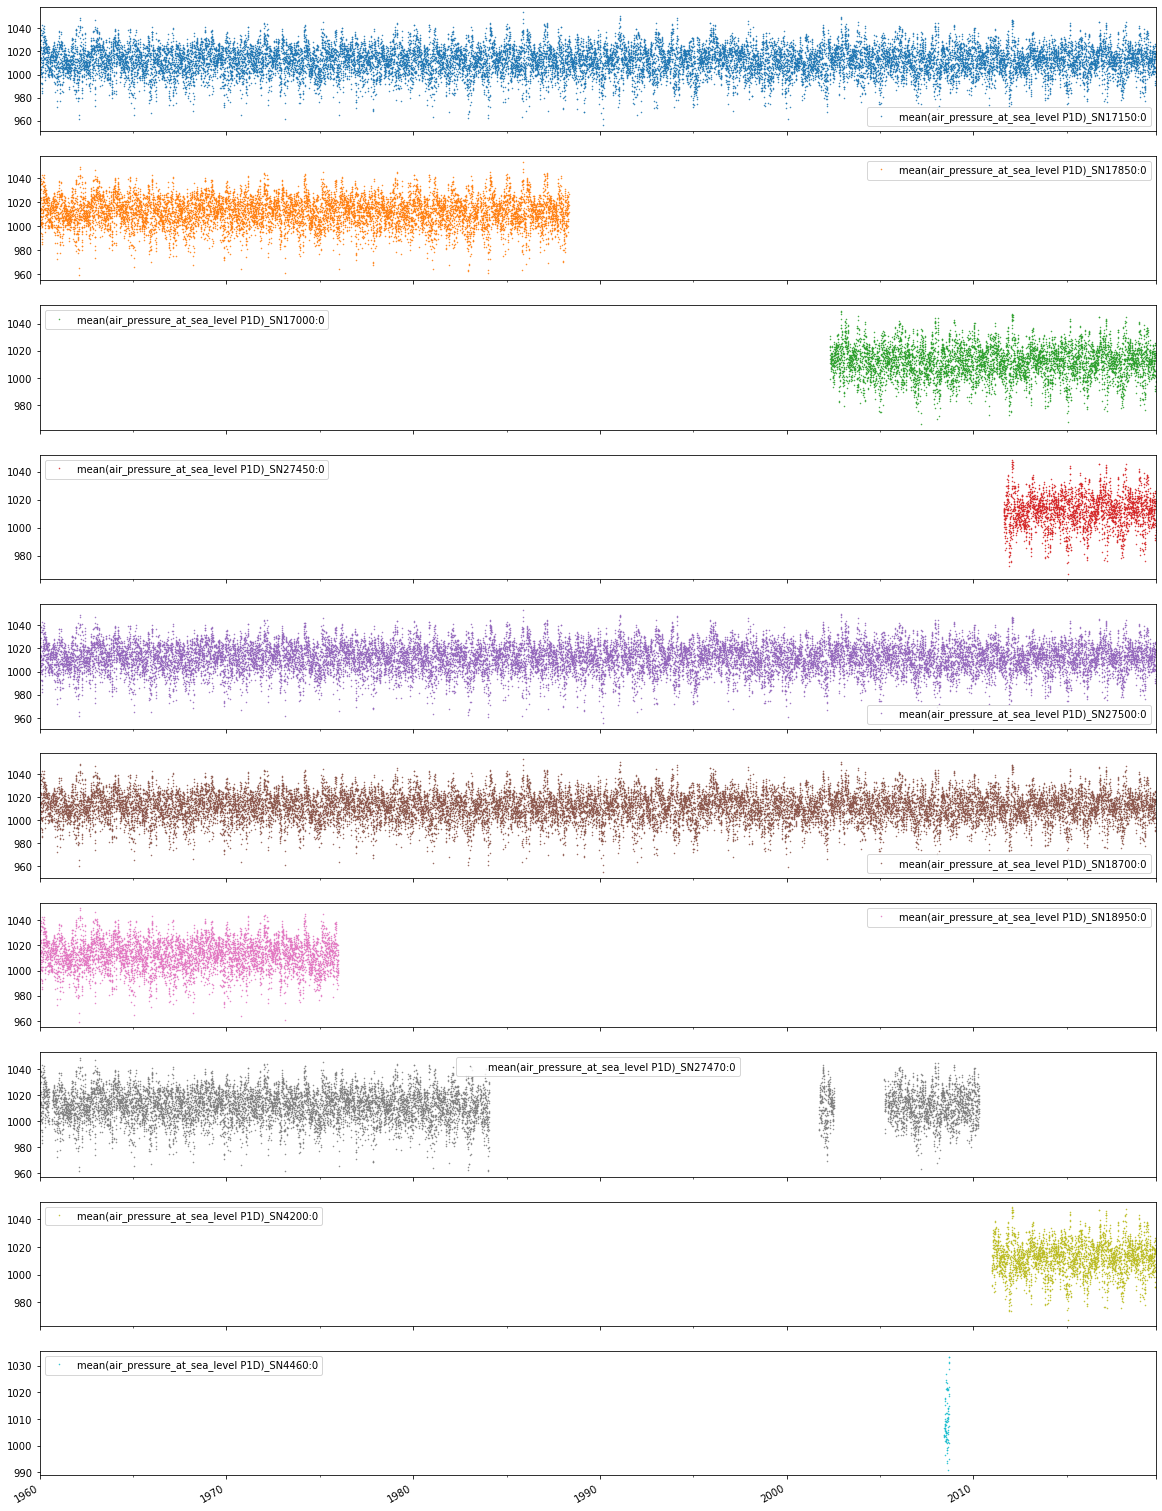

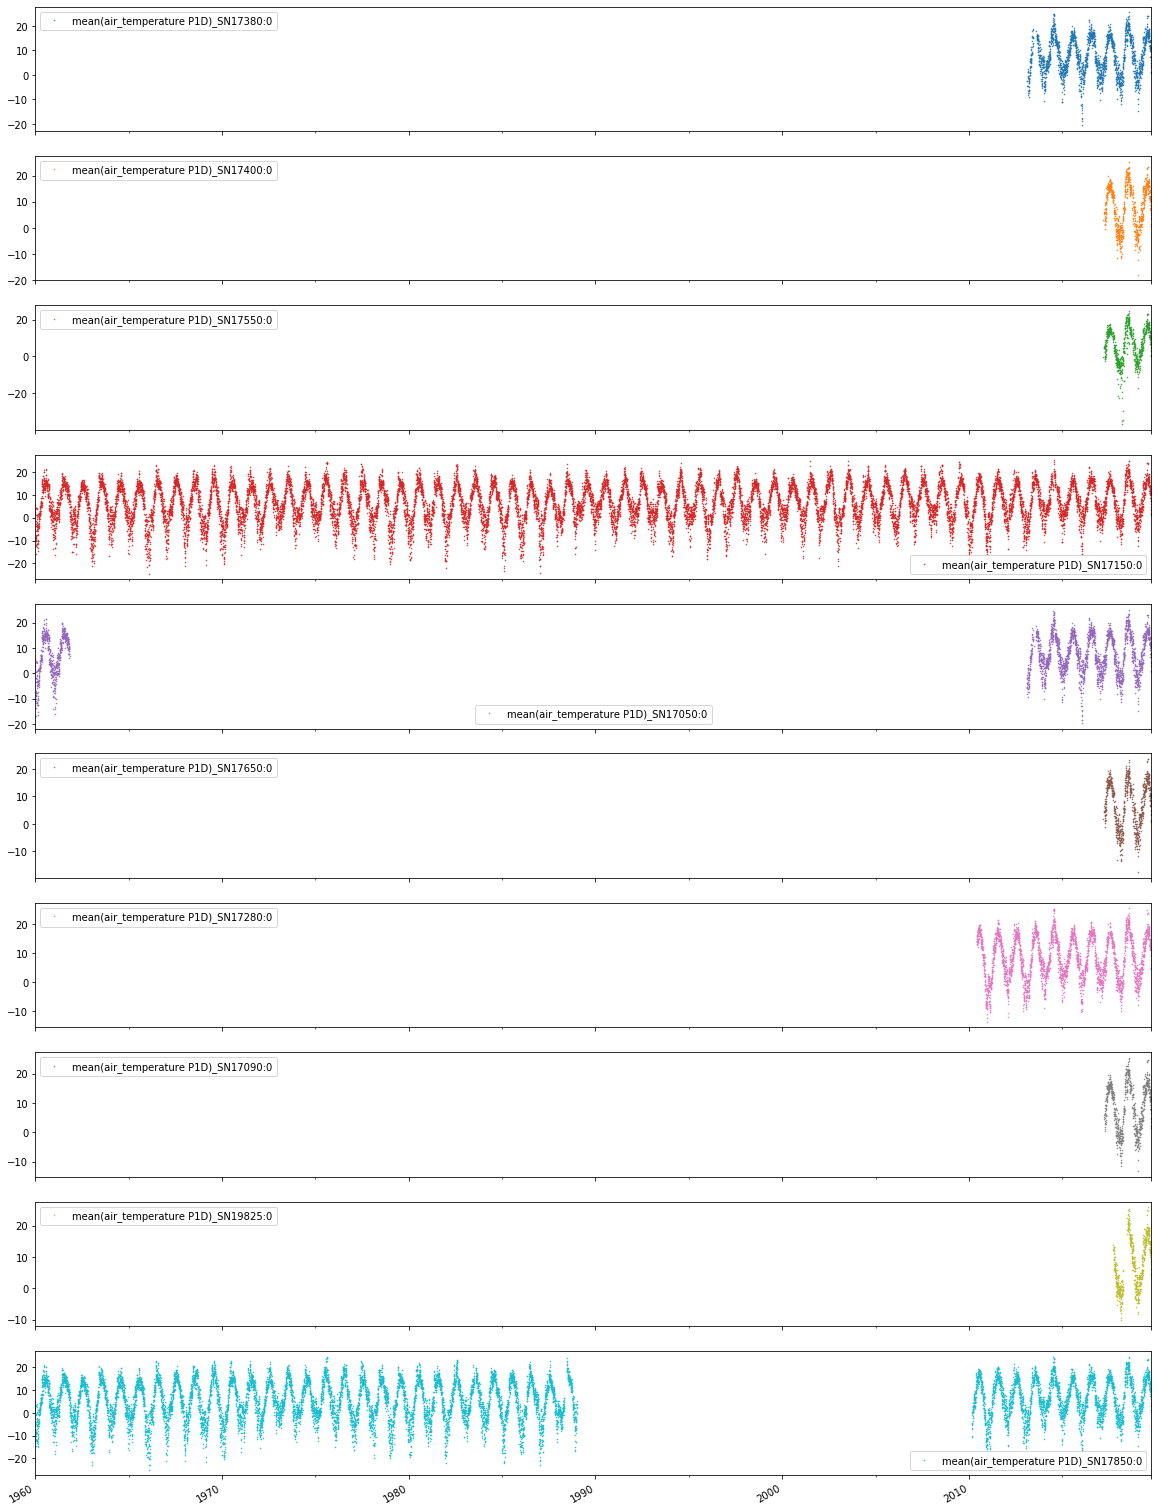

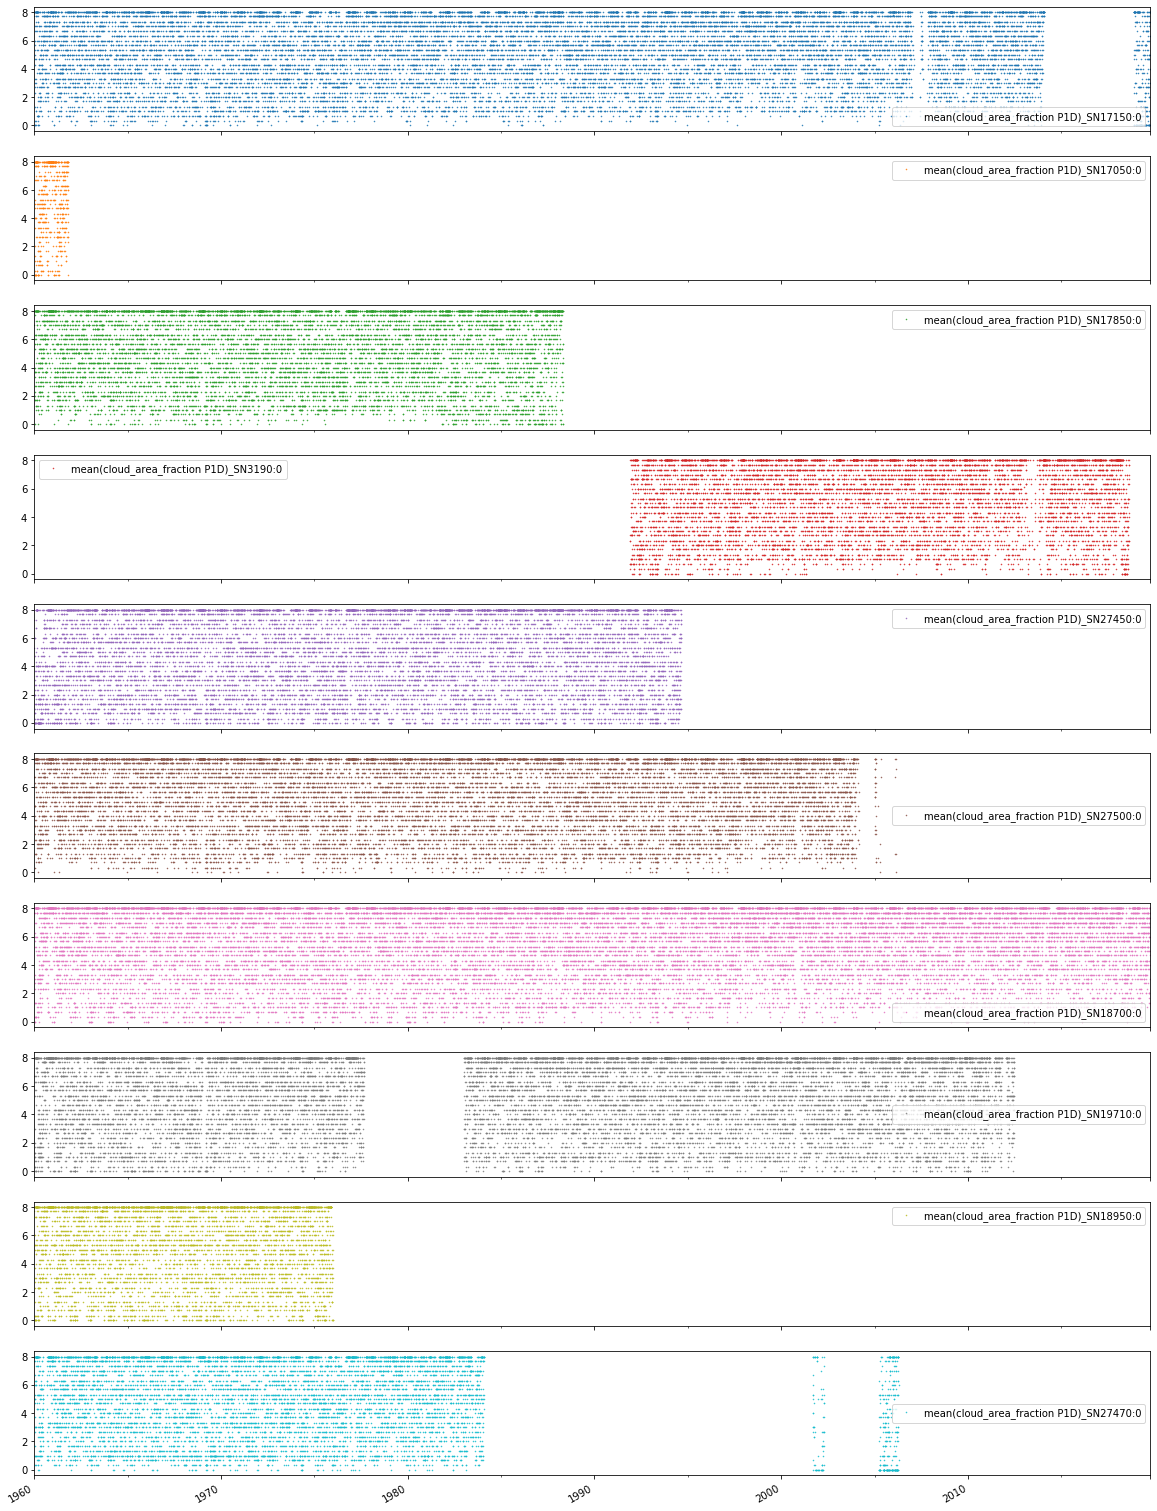

In [28]:
for key in allData:
    plotVar(key)
    fig=plt.gcf()
    fig.savefig('meteo_{}.png'.format(key))
    


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d285f4240>,
      dtype=object)

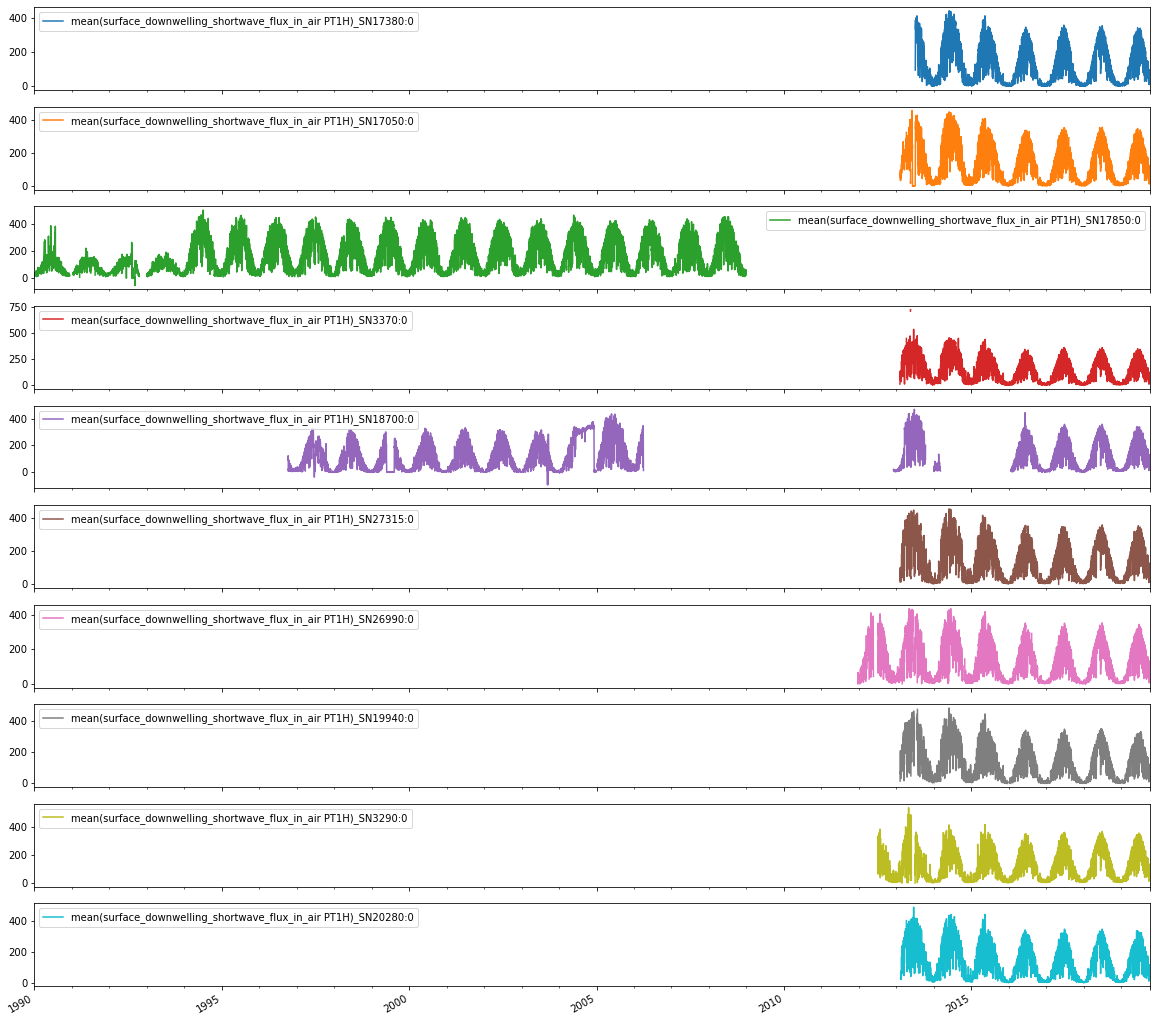

In [25]:
allData['radiation'].resample('d').mean().plot(subplots=True,figsize=(20,20))

In [26]:
result.plot(figsize=(20,10),marker='.',linestyle='None',markersize=1)

NameError: name 'result' is not defined